In [3]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import cmasher as cm
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')
import jax
from scipy import stats
import matplotlib.gridspec as grid
from matplotlib.colors import LogNorm

In [34]:
# LOAD THE DATA
path = '/Users/dhortadarrington/Documents/Master/data/MWM-ipl3-gaiadr3-APW_orbits_BJdist.fits'
tb = fits.open(path)
data = tb[1].data 
print(len(data))

1059521


In [6]:
# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_catalogo_14_mayo.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb2 = fits.open(path+file)
data2 = tb2[1].data
gc_star_ids = data2.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids))+' GC stars')

# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'VAC_GC_DR17_synspec_rev1_beta.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb3 = fits.open(path+file)
data3 = tb3[1].data
gc_star_ids_RPS = data3.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids_RPS))+' GC stars')

There are 7562 GC stars
There are 7737 GC stars


In [10]:
apo_id = data['sdss4_apogee_id']
# Clean the initial data
mask_gcs = np.isin(list(apo_id),list(gc_star_ids))
mask_gcs2 = np.isin(list(apo_id),list(gc_star_ids_RPS))

In [12]:
# starflag_bits = np.array(
#     [
#         0,  # BAD_PIXELS
#         1,  # COMMISSIONING
#         3,  # VERY_BRIGHT_NEIGHBOR
#         16,  # SUSPECT_RV_COMBINATION
#         17,  # SUSPECT_BROAD_LINES
#         19,  # RV_REJECT
#         21,  # MULTIPLE_SUSPECT
#         22,  # RV_FAIL
#     ]
# )
# starflag_bitmask = np.sum(2**starflag_bits)
# starflag_mask = (data["STARFLAG"] & starflag_bitmask) == 0
# starflag_mask.sum()

# aspcapflag_bits = np.array(
#     [
#         23,  # STAR_BAD
#     ]
# )
# aspcapflag_bitmask = np.sum(2**aspcapflag_bits)
# aspcapflag_mask = (data["ASPCAPFLAG"] & aspcapflag_bitmask) == 0
# aspcapflag_mask.sum()

(array([6477., 8921., 8655., 7867., 7355., 7208., 7340., 7460., 7358.,
        7515., 7383., 7159., 7155., 6662., 6385., 6075., 5688., 5334.,
        4976., 4794., 4432., 4275., 3996., 3853., 3777., 3644., 3481.,
        3453., 3414., 3061., 3198., 3082., 3141., 2949., 2825., 2926.,
        2679., 2663., 2677., 2630., 2557., 2499., 2464., 2243., 2365.,
        2279., 2329., 2218., 2283., 2171., 2288., 2163., 2104., 2099.,
        1996., 2043., 1936., 1836., 2026., 1834., 1799., 1790., 1802.,
        1890., 1896., 1740., 1717., 1742., 1699., 1676., 1585., 1578.,
        1718., 1545., 1540., 1544., 1470., 1484., 1429., 1507., 1467.,
        1456., 1413., 1449., 1396., 1454., 1418., 1283., 1317., 1333.,
        1320., 1291., 1278., 1223., 1251., 1242., 1165., 1251., 1304.,
        1185.]),
 array([2.16841698e-04, 5.02136052e-02, 1.00210369e-01, 1.50207132e-01,
        2.00203896e-01, 2.50200659e-01, 3.00197423e-01, 3.50194186e-01,
        4.00190949e-01, 4.50187713e-01, 5.00184476e-01, 5.

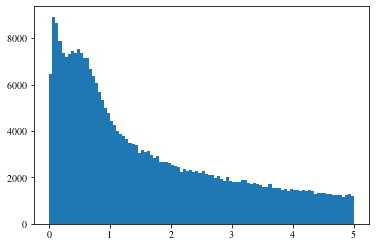

In [16]:
plt.hist(dist_err[dist_err<5],100)

In [23]:
# create the parent mask
dist = data['r_med_photogeo']
dist_err = (data['r_hi_photogeo']-data['r_lo_photogeo'])/2.

mask = (data['snr']>50)&(data['logg']<3.5)&(data['logg']>0.)&(data['teff']>3500.)&(data['teff']<5500.)\
    &(mask_gcs==False)&(mask_gcs2==False)&(dist<20000.)&((dist/dist_err)>5)

print('There are '+str(len(data[mask]))+' stars in the parent sample')

There are 460962 stars in the parent sample


In [42]:
L = np.reshape(data['L'],(len(data),17,3))

In [47]:
x = np.mean(data['xyz'][:,:,0],axis=1)
y = np.mean(data['xyz'][:,:,1],axis=1)
z = np.mean(data['xyz'][:,:,2],axis=1)

vx = np.mean(data['vxyz'][:,:,0],axis=1)
vy = np.mean(data['vxyz'][:,:,1],axis=1)
vz = np.mean(data['vxyz'][:,:,2],axis=1)

Lx = np.mean(L[:,:,0],axis=1)
Ly = np.mean(L[:,:,1],axis=1)
Lz = np.mean(L[:,:,2],axis=1)


In [49]:
# Eilers rotation curve
R = np.sqrt(x**2+y**2)
vcirc = 229.-1.7*(R-8.275)
Rg = (-Lz/vcirc)
phi = np.arctan(y/-x)
deltaR = R-Rg


# Aitoff plus Kiel Diagrams

<Figure size 1008x504 with 0 Axes>

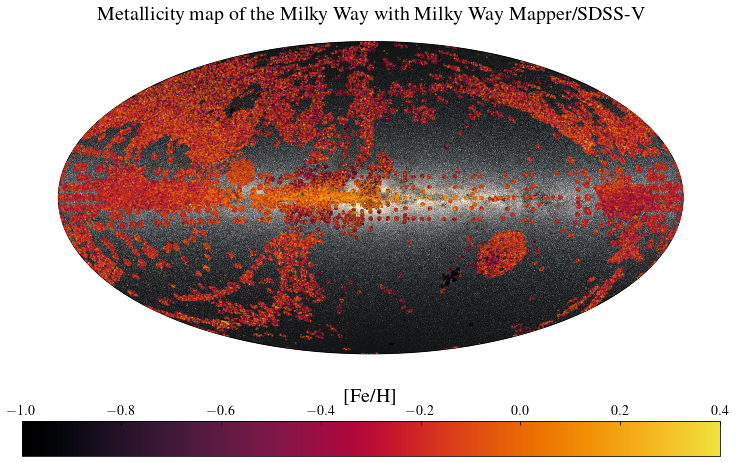

In [52]:
from astropy import units as  u
import astropy.coordinates as apycoords
from galpy.orbit import Orbit
from astropy.coordinates import SkyCoord
import sys
sys.path.append("/users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/")
from mw_plot import MWSkyMap
from mw_plot import MWPlot

coords = SkyCoord(ra=data['RA'], dec=data['DEC'], unit='degree')
ra = coords.ra.wrap_at(180 * u.deg)
dec = coords.dec

# setup a MWSkyMap instance
plot_instance = MWSkyMap(projection='aitoff')

fig = plt.figure(figsize=(14,7),constrained_layout=True,rasterized=True,facecolor='white')
# so that the colorbar will has a better contract
# plot_instance.clim = (5., 15.)

# alpha value for the milkyway image
plot_instance.imalpha = 1.

# setup colormap
# plot_instance.cmap='magma'
plot_instance.vmin= -1.
plot_instance.vmax= 0.4

# set up plot title
plot_instance.title = 'Metallicity map of the Milky Way with Milky Way Mapper/SDSS-V'
plot_instance.s = 0.1

xedges = np.linspace(-180,180,128)
yedges = np.linspace(-90,90,128)

# H, xedges, yedges = np.histogram2d(ra[mask] , dec[mask], bins=(xedges* u.deg,yedges* u.deg))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.

# use mw_scatter instead of scatter
# plot_instance.mw_density([ra[mask]] * u.degree, [dec[mask]] * u.degree,H.T)
plot_instance.scatter([ra[mask]] * u.degree, [dec[mask]] * u.degree,c=data['FE_H'][mask],vmin=-1,vmax=0.4,cmap=cm.ember)

# Show the figure
plot_instance.show()

color = plt.scatter([ra[mask]] * u.degree, [dec[mask]] * u.degree,c=data['FE_H'][mask],s=1e-10,vmin=-1,vmax=0.4,cmap=cm.ember)

cb = fig.colorbar(color, orientation="horizontal", location="bottom")
cb.set_label(r"[Fe/H]", fontsize=20)
cb.ax.tick_params(labelsize=14,direction='in',length=4)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig('/Users/dhortadarrington/Documents/Projects/orbital-cartography/plots/aitoff-feh-ember.pdf',dpi=200, bbox_inches = 'tight')



In [54]:
mgfe = data['mg_h']-data['fe_h']

<Figure size 1008x504 with 0 Axes>

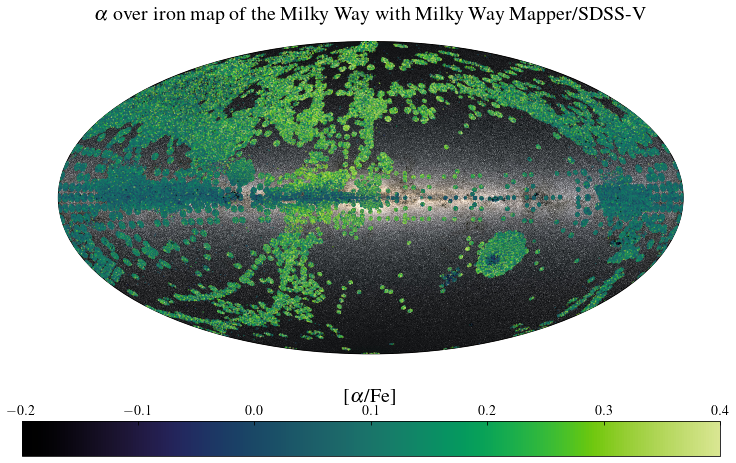

In [55]:
from astropy import units as  u
import astropy.coordinates as apycoords
from galpy.orbit import Orbit
from astropy.coordinates import SkyCoord
import sys
sys.path.append("/users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/")
from mw_plot import MWSkyMap
from mw_plot import MWPlot

coords = SkyCoord(ra=data['RA'], dec=data['DEC'], unit='degree')
ra = coords.ra.wrap_at(180 * u.deg)
dec = coords.dec

# setup a MWSkyMap instance
plot_instance = MWSkyMap(projection='aitoff')

fig = plt.figure(figsize=(14,7),constrained_layout=True,rasterized=True)
# so that the colorbar will has a better contract
# plot_instance.clim = (5., 15.)

# alpha value for the milkyway image
plot_instance.imalpha = 1.

# setup colormap
# plot_instance.cmap='magma'
plot_instance.vmin= -1.
plot_instance.vmax= 0.4

# set up plot title
plot_instance.title = r'$\alpha$ over iron map of the Milky Way with Milky Way Mapper/SDSS-V'
plot_instance.s = 0.1

xedges = np.linspace(-180,180,128)
yedges = np.linspace(-90,90,128)

# H, xedges, yedges = np.histogram2d(ra[mask] , dec[mask], bins=(xedges* u.deg,yedges* u.deg))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.

# use mw_scatter instead of scatter
# plot_instance.mw_density([ra[mask]] * u.degree, [dec[mask]] * u.degree,H.T)
plot_instance.scatter([ra[mask]] * u.degree, [dec[mask]] * u.degree,c=mgfe[mask],vmin=-0.2,vmax=0.4,cmap=cm.toxic)

# Show the figure
plot_instance.show()

color = plt.scatter([ra[mask]] * u.degree, [dec[mask]] * u.degree,c=mgfe[mask],s=1e-10,vmin=-0.2,vmax=0.4,cmap=cm.toxic)

cb = fig.colorbar(color, orientation="horizontal", location="bottom")
cb.set_label(r"[$\alpha$/Fe]", fontsize=20)
cb.ax.tick_params(labelsize=14,direction='in',length=4)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig('/Users/dhortadarrington/Documents/Projects/orbital-cartography/plots/aitoff-mgfe.pdf',dpi=200, bbox_inches = 'tight')



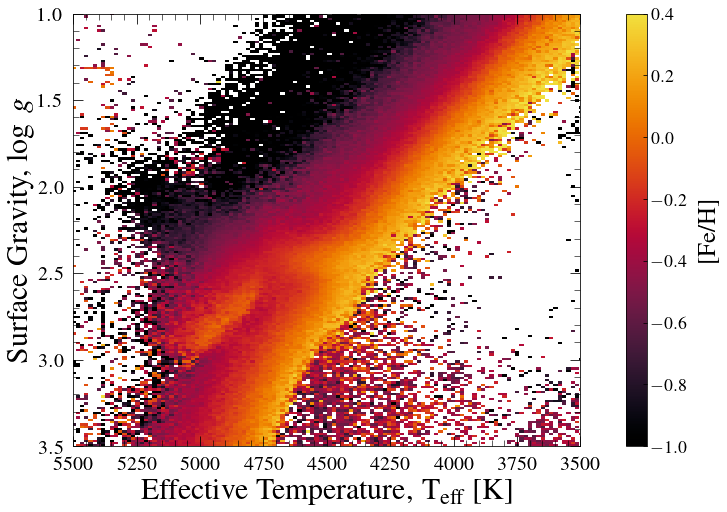

In [56]:
nbins=298
fig = plt.figure(figsize=(10,7),facecolor='white',constrained_layout=True,rasterized=True)

mask_plot = (np.abs(data['TEFF'])<8000)&(np.abs(data['LOGG'])<4.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(3000,8000,nbins)
biny = np.linspace(0,4,nbins)
hist = stats.binned_statistic_2d(data['TEFF'][mask&mask_plot],data['LOGG'][mask&mask_plot], data['FE_H'][mask&mask_plot], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.ember,vmin=-1,vmax=0.4)
plt.xlim(5500,3500)
plt.ylim(3.5,1)
plt.xlabel('Effective Temperature, T$_{\mathrm{eff}}$ [K]',fontsize=30)
plt.ylabel('Surface Gravity, $\log~g$',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cb = fig.colorbar(color, orientation="vertical", location="right")
cb.set_label(r"[Fe/H]", fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=18,direction='in',length=4)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig('/Users/dhortadarrington/Documents/Projects/orbital-cartography/plots/data-kiel.pdf',dpi=200, bbox_inches = 'tight')



In [ ]:
line = data['FE_H']*-0.167 + 0.12

lowa = ((data['FE_H']>-0.8)&(data['FE_H']<-0.4)&(mgfe<0.185))|((data['FE_H']>-0.4)&(data['FE_H']<-0.05)&(mgfe<line))|((data['FE_H']>-0.05)&(data['FE_H']<0.6)&(mgfe<0.12))

higha = ((data['FE_H']>-1)&(data['FE_H']<-0.4)&(mgfe>line))|\
((data['FE_H']>-0.4)&(data['FE_H']<0.6)&(mgfe>0.185))
# ((data['FE_H']>-1)&(data['FE_H']<0.)&(data['MG_FE']>line))|((data['FE_H']>0.)&(data['FE_H']<0.6)&(data['MG_FE']>0.12))

print(len(data[mask&lowa]))
print(len(data[mask&higha]))


In [ ]:
nbins=298
fig = plt.figure(figsize=(28,14),facecolor='white',constrained_layout=True,rasterized=True)

plt.subplot(2,3,1)
mask_plot = (np.abs(data['FE_H'])<2)&(np.abs(data['MG_FE'])<1.)
plt.hist2d(data['FE_H'][mask&mask_plot],data['MG_FE'][mask&mask_plot],bins=200,cmap=cm.sapphire_r,norm=LogNorm(),alpha=0.2)
plt.text(-0.9,0.5,r'High-$\alpha$ disc',fontsize=40)
color = plt.hist2d(data['FE_H'][mask&mask_plot&higha],data['MG_FE'][mask&mask_plot&higha],bins=200,cmap=cm.sapphire_r,norm=LogNorm())
plt.xlim(-1,0.6)
plt.ylim(-0.2,0.6)
# plt.xlabel(r'Metallicity, [Fe/H]',fontsize=30)
plt.ylabel(r'$\alpha$ over iron, [Mg/Fe]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.18, 0.89, 0.12,0.02])
cb = plt.colorbar(cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(2,3,2)
mask_plot = (np.abs(data['xyz'][:,0])<20)&(np.abs(data['xyz'][:,1])<20.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(-20,0,nbins)
biny = np.linspace(-10,10,nbins)
hist = stats.binned_statistic_2d(data['xyz'][:,0][mask&mask_plot&higha],data['xyz'][:,1][mask&mask_plot&higha], data['FE_H'][mask&mask_plot&higha], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.ember,vmin=-1,vmax=0.)
plt.text(-8.5,-0.25,r'$\odot$',fontsize=40,color='white',font='bold')
plt.xlim(-15,0)
plt.ylim(-7.5,7.5)
# plt.xlabel('Galactocentric $x$ [kpc]',fontsize=30)
plt.ylabel('Galactocentric $y$ [kpc]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# cbar_ax = fig.add_axes([0.52, 0.89, 0.12,0.02])
# cb = plt.colorbar(color,cax = cbar_ax,orientation='horizontal')
# cb.set_label(label=r"Mean [Fe/H]",fontsize=30,labelpad=10)
# cb.ax.tick_params(labelsize=25)
# cb.ax.xaxis.set_ticks_position('top')
# cb.ax.xaxis.set_label_position('top')

plt.subplot(2,3,3)
mask_plot = (np.abs(data['xyz'][:,0])<20)&(np.abs(data['xyz'][:,2])<20.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(-20,0,nbins)
biny = np.linspace(-10,10,nbins)
hist = stats.binned_statistic_2d(data['xyz'][:,0][mask&mask_plot&higha],data['xyz'][:,2][mask&mask_plot&higha], data['FE_H'][mask&mask_plot&higha], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.ember,vmin=-1,vmax=0.)
plt.text(-8.5,0.,r'$\odot$',fontsize=40,color='white',font='bold')
plt.xlim(-15,0)
plt.ylim(-5,5)
# plt.xlabel('Galactocentric $x$ [kpc]',fontsize=30)
plt.ylabel('Galactocentric $z$ [kpc]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cb = fig.colorbar(color, orientation="vertical", location="right")
cb.set_label(r"Mean [Fe/H]", fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=18,direction='in',length=4)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(2,3,4)
mask_plot = (np.abs(data['FE_H'])<2)&(np.abs(data['MG_FE'])<1.)
plt.hist2d(data['FE_H'][mask&mask_plot],data['MG_FE'][mask&mask_plot],bins=200,cmap=cm.sapphire_r,norm=LogNorm(),alpha=0.2)
plt.text(-0.9,0.5,r'Low-$\alpha$ disc',fontsize=40)
color = plt.hist2d(data['FE_H'][mask&mask_plot&lowa],data['MG_FE'][mask&mask_plot&lowa],bins=200,cmap=cm.sapphire_r,norm=LogNorm())
plt.xlim(-1,0.6)
plt.ylim(-0.2,0.6)
plt.xlabel(r'Metallicity, [Fe/H]',fontsize=30)
plt.ylabel(r'$\alpha$ over iron, [Mg/Fe]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.18, 0.4, 0.12,0.02])
cb = plt.colorbar(cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(2,3,5)
mask_plot = (np.abs(data['xyz'][:,0])<20)&(np.abs(data['xyz'][:,1])<20.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(-20,0,nbins)
biny = np.linspace(-10,10,nbins)
hist = stats.binned_statistic_2d(data['xyz'][:,0][mask&mask_plot&lowa],data['xyz'][:,1][mask&mask_plot&lowa], data['FE_H'][mask&mask_plot&lowa], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.ember,vmin=-0.6,vmax=0.4)
plt.text(-8.5,-0.25,r'$\odot$',fontsize=40,color='white',font='bold')
plt.xlim(-15,0)
plt.ylim(-7.5,7.5)
plt.xlabel('Galactocentric $x$ [kpc]',fontsize=30)
plt.ylabel('Galactocentric $y$ [kpc]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(2,3,6)
mask_plot = (np.abs(data['xyz'][:,0])<20)&(np.abs(data['xyz'][:,2])<20.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(-20,0,nbins)
biny = np.linspace(-10,10,nbins)
hist = stats.binned_statistic_2d(data['xyz'][:,0][mask&mask_plot&lowa],data['xyz'][:,2][mask&mask_plot&lowa], data['FE_H'][mask&mask_plot&lowa], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.ember,vmin=-0.6,vmax=0.4)
plt.text(-8.5,0.,r'$\odot$',fontsize=40,color='white',font='bold')
plt.xlim(-15,0)
plt.ylim(-5,5)
plt.xlabel('Galactocentric $x$ [kpc]',fontsize=30)
plt.ylabel('Galactocentric $z$ [kpc]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cb = fig.colorbar(color, orientation="vertical", location="right")
cb.set_label(r"Mean [Fe/H]", fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=18,direction='in',length=4)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig('/Users/dhortadarrington/Documents/Projects/orbital-cartography/plots/data-high-low-alpha-xyz.pdf',dpi=200, bbox_inches = 'tight')



In [ ]:
nbins=298
fig = plt.figure(figsize=(28,14),facecolor='white',constrained_layout=True,rasterized=True)

plt.subplot(2,3,1)
mask_plot = (np.abs(data['FE_H'])<2)&(np.abs(data['MG_FE'])<1.)
plt.hist2d(data['FE_H'][mask&mask_plot],data['MG_FE'][mask&mask_plot],bins=200,cmap=cm.sapphire_r,norm=LogNorm(),alpha=0.2)
plt.text(-0.9,0.5,r'High-$\alpha$ disc',fontsize=40)
color = plt.hist2d(data['FE_H'][mask&mask_plot&higha],data['MG_FE'][mask&mask_plot&higha],bins=200,cmap=cm.sapphire_r,norm=LogNorm())
plt.xlim(-1,0.6)
plt.ylim(-0.2,0.6)
# plt.xlabel(r'Metallicity, [Fe/H]',fontsize=30)
plt.ylabel(r'$\alpha$ over iron, [Mg/Fe]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.18, 0.89, 0.12,0.02])
cb = plt.colorbar(cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(2,3,2)
mask_plot = (np.abs(data['xyz'][:,0])<20)&(np.abs(data['xyz'][:,1])<20.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(-20,0,nbins)
biny = np.linspace(-10,10,nbins)
hist = stats.binned_statistic_2d(data['xyz'][:,0][mask&mask_plot&higha],data['xyz'][:,1][mask&mask_plot&higha], data['MG_FE'][mask&mask_plot&higha], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.toxic,vmin=0.2,vmax=0.4)
plt.text(-8.5,-0.25,r'$\odot$',fontsize=40,color='white',font='bold')
plt.xlim(-15,0)
plt.ylim(-7.5,7.5)
# plt.xlabel('Galactocentric $x$ [kpc]',fontsize=30)
plt.ylabel('Galactocentric $y$ [kpc]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# cbar_ax = fig.add_axes([0.52, 0.89, 0.12,0.02])
# cb = plt.colorbar(color,cax = cbar_ax,orientation='horizontal')
# cb.set_label(label=r"Mean [Fe/H]",fontsize=30,labelpad=10)
# cb.ax.tick_params(labelsize=25)
# cb.ax.xaxis.set_ticks_position('top')
# cb.ax.xaxis.set_label_position('top')

plt.subplot(2,3,3)
mask_plot = (np.abs(data['xyz'][:,0])<20)&(np.abs(data['xyz'][:,2])<20.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(-20,0,nbins)
biny = np.linspace(-10,10,nbins)
hist = stats.binned_statistic_2d(data['xyz'][:,0][mask&mask_plot&higha],data['xyz'][:,2][mask&mask_plot&higha], data['MG_FE'][mask&mask_plot&higha], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.toxic,vmin=0.2,vmax=0.4)
plt.text(-8.5,0.,r'$\odot$',fontsize=40,color='white',font='bold')
plt.xlim(-15,0)
plt.ylim(-5,5)
# plt.xlabel('Galactocentric $x$ [kpc]',fontsize=30)
plt.ylabel('Galactocentric $z$ [kpc]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cb = fig.colorbar(color, orientation="vertical", location="right")
cb.set_label(r"mean [Mg/Fe]", fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=18,direction='in',length=4)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(2,3,4)
mask_plot = (np.abs(data['FE_H'])<2)&(np.abs(data['MG_FE'])<1.)
plt.hist2d(data['FE_H'][mask&mask_plot],data['MG_FE'][mask&mask_plot],bins=200,cmap=cm.sapphire_r,norm=LogNorm(),alpha=0.2)
plt.text(-0.9,0.5,r'Low-$\alpha$ disc',fontsize=40)
color = plt.hist2d(data['FE_H'][mask&mask_plot&lowa],data['MG_FE'][mask&mask_plot&lowa],bins=200,cmap=cm.sapphire_r,norm=LogNorm())
plt.xlim(-1,0.6)
plt.ylim(-0.2,0.6)
plt.xlabel(r'Metallicity, [Fe/H]',fontsize=30)
plt.ylabel(r'$\alpha$ over iron, [Mg/Fe]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.18, 0.4, 0.12,0.02])
cb = plt.colorbar(cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.subplot(2,3,5)
mask_plot = (np.abs(data['xyz'][:,0])<20)&(np.abs(data['xyz'][:,1])<20.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(-20,0,nbins)
biny = np.linspace(-10,10,nbins)
hist = stats.binned_statistic_2d(data['xyz'][:,0][mask&mask_plot&lowa],data['xyz'][:,1][mask&mask_plot&lowa], data['MG_FE'][mask&mask_plot&lowa], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.toxic,vmin=-0.1,vmax=0.15)
plt.text(-8.5,-0.25,r'$\odot$',fontsize=40,color='white',font='bold')
plt.xlim(-15,0)
plt.ylim(-7.5,7.5)
plt.xlabel('Galactocentric $x$ [kpc]',fontsize=30)
plt.ylabel('Galactocentric $y$ [kpc]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(2,3,6)
mask_plot = (np.abs(data['xyz'][:,0])<20)&(np.abs(data['xyz'][:,2])<20.)&(np.abs(data['FE_H'])<2.)
binx = np.linspace(-20,0,nbins)
biny = np.linspace(-10,10,nbins)
hist = stats.binned_statistic_2d(data['xyz'][:,0][mask&mask_plot&lowa],data['xyz'][:,2][mask&mask_plot&lowa], data['MG_FE'][mask&mask_plot&lowa], statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap=cm.toxic,vmin=-0.1,vmax=0.15)
plt.text(-8.5,0.,r'$\odot$',fontsize=40,color='white',font='bold')
plt.xlim(-15,0)
plt.ylim(-5,5)
plt.xlabel('Galactocentric $x$ [kpc]',fontsize=30)
plt.ylabel('Galactocentric $z$ [kpc]',fontsize=30)
plt.tick_params(labelsize=25,direction='in',top=True,right=True,length=6,pad=10)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cb = fig.colorbar(color, orientation="vertical", location="right")
cb.set_label(r"mean [Mg/Fe]", fontsize=25,labelpad=10)
cb.ax.tick_params(labelsize=18,direction='in',length=4)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig('/Users/dhortadarrington/Documents/Projects/orbital-cartography/plots/data-high-low-alpha-xyz-mgfe.pdf',dpi=200, bbox_inches = 'tight')

